In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('steam-200k.csv',header=None,names=['Gamer_ID','Game','Type','value','Other'])
df.head(10)

,Gamer_ID,Game,Type,value,Other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
5,151603712,Spore,play,14.9,0
6,151603712,Fallout New Vegas,purchase,1.0,0
7,151603712,Fallout New Vegas,play,12.1,0
8,151603712,Left 4 Dead 2,purchase,1.0,0
9,151603712,Left 4 Dead 2,play,8.9,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Gamer_ID  200000 non-null  int64  
 1   Game      200000 non-null  object 
 2   Type      200000 non-null  object 
 3   value     200000 non-null  float64
 4   Other     200000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [3]:
df.describe()

,Gamer_ID,value,Other
count,2.000000e+05,200000.000000,200000.0
mean,1.036559e+08,17.874384,0.0
std,7.208074e+07,138.056952,0.0
min,5.250000e+03,0.100000,0.0
25%,4.738420e+07,1.000000,0.0
50%,8.691201e+07,1.000000,0.0
75%,1.542309e+08,1.300000,0.0
max,3.099031e+08,11754.000000,0.0


In [4]:
values = df.groupby(['Game', 'Type']).size()
values.head(10)

Game                                                        Type    
007 Legends                                                 play        1
                                                            purchase    1
0RBITALIS                                                   play        3
                                                            purchase    3
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby)  play        5
                                                            purchase    7
10 Second Ninja                                             play        2
                                                            purchase    6
10,000,000                                                  play        1
                                                            purchase    1
dtype: int64

In [5]:
print("Number of games : {0}".format(len(df.Game.unique())))
print("Number of users : {0}".format(len(df.Gamer_ID.unique())))

Number of games : 5155
Number of users : 12393


In [6]:
df.head()

,Gamer_ID,Game,Type,value,Other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [7]:
df_2=df.pivot_table('value',index='Game',columns='Type',aggfunc=np.sum)
df_2.sort_values(by='purchase',ascending = False).head(15)

Type,play,purchase
Game,,
Dota 2,981684.6,4841.0
Team Fortress 2,173673.3,2323.0
Unturned,16096.4,1563.0
Counter-Strike Global Offensive,322771.6,1412.0
Half-Life 2 Lost Coast,184.4,981.0
Counter-Strike Source,96075.5,978.0
Left 4 Dead 2,33596.7,951.0
Counter-Strike,134261.1,856.0
Warframe,27074.6,847.0


1271.3333333333333

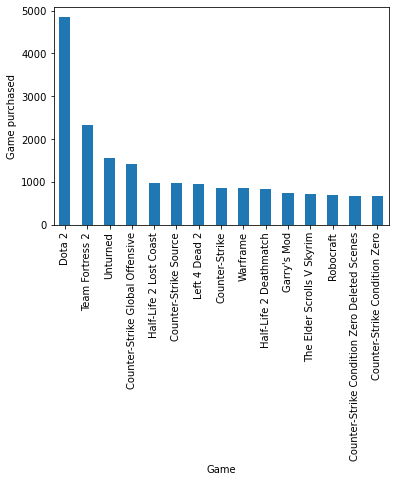

In [8]:
df_3=df_2.sort_values(by='purchase',ascending = False).head(15)
df_3['purchase'].plot.bar(rot=90)
plt.xlabel('Game')
plt.ylabel('Game purchased')
df_3['purchase'].mean()

Nous avons dans ce graphique les 15 jeux les plus achetés sur STEAM. Nous remarquons que le premier jeu "DOTA 2 " représente le double du deuxième jeu "Team Fortress 2" et quatre fois la moyenne des jeux achetés

In [9]:
df.sort_values(by='value',ascending = False).head(15)

,Gamer_ID,Game,Type,value,Other
123726,73017395,Sid Meier's Civilization V,play,11754.0,0
112643,100630947,Dota 2,play,10442.0,0
187005,153382649,Team Fortress 2,play,9640.0,0
165596,130882834,Dota 2,play,7765.0,0
183461,52567955,Dota 2,play,6964.0,0
128440,121199670,Dota 2,play,6753.0,0
113436,86256882,Dota 2,play,6015.0,0
140270,70487610,Sid Meier's Civilization V,play,6013.0,0
96010,101414179,Dota 2,play,5982.0,0
141312,12660489,Dota 2,play,5970.0,0


Sur les 15 jeux qui détiennent le plus d'heures de jeux, nous remarquons l'existence que le jeu 'Eastside Hockey Manager' est celui qui détient une majotité de plus de 1200 heures de jeu sur une moyenne de 417 heures de jeu

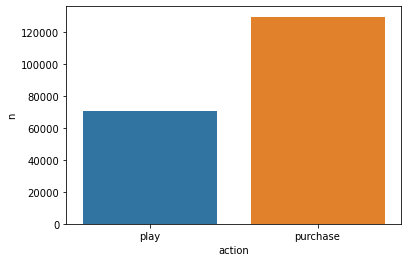

In [10]:
actions = df.groupby('Type')['Type'].agg('count')
actions = pd.DataFrame({'action': actions.index, 'n': actions.values})
sns.barplot(x = 'action', y = 'n', data = actions)

D'après ce graphique, nous remarquons que les jeux achetés représentent le double des jeux joués sur STEAM.

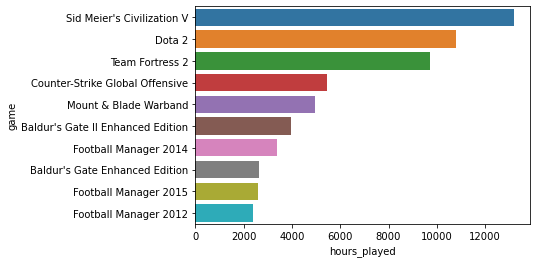

In [11]:
top = 10
user_counts = df.groupby('Gamer_ID')['value'].agg(np.sum).sort_values(ascending=False)[0:top]
mask = df['Gamer_ID'].isin(user_counts.index)
df_infos_user = df.loc[mask].loc[df['Type'] == 'play']
hours_played = df_infos_user.groupby('Game')['value'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:top]

sns.barplot(y = 'game', x = 'hours_played', data = hours_played)

Ce graphique représente le top 10 des jeux avec le plus nombre d'heures joués à leur actif

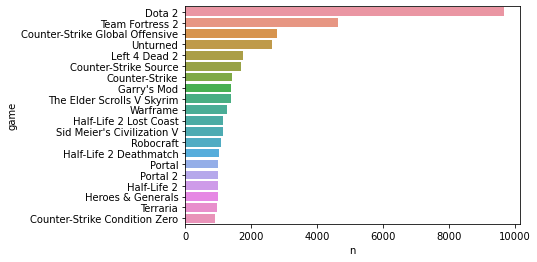

In [12]:
game_counts = df.groupby('Game')['Game'].agg('count').sort_values(ascending=False)
game_counts = pd.DataFrame({'game': game_counts.index, 'n': game_counts.values})[0:20]
sns.barplot(y = 'game', x = 'n', data = game_counts)

Ce graphique représente les jeux avec le plus de transactions à son actif. Nous remarquons que "DOTA 2" dépasse largement les autres jeux en terme de transaction

In [13]:
df_agg=df[['Gamer_ID','Game']].groupby('Gamer_ID').agg(set)
df_agg=df_agg.values.reshape(-1,)
df_agg

array([{'Deathmatch Classic', 'Portal 2', 'Deus Ex Human Revolution', 'Ricochet', 'Team Fortress 2', 'Counter-Strike Source', 'Half-Life', 'Half-Life 2 Deathmatch', 'Dota 2', 'Half-Life Blue Shift', 'Counter-Strike', 'Half-Life Opposing Force', 'Half-Life 2 Lost Coast', 'Team Fortress Classic', 'Alien Swarm', 'Half-Life 2 Episode One', 'Portal', 'Half-Life 2 Episode Two', 'Cities Skylines', 'Half-Life 2', 'Day of Defeat'},
       {'Deathmatch Classic', 'Call of Duty Modern Warfare 2 - Multiplayer', 'Call of Duty Modern Warfare 2', 'Portal 2', 'Total War ATTILA', 'Ricochet', 'Thief 2', 'Worms Armageddon', 'Counter-Strike Source', 'Thief - Ghost', 'Half-Life', 'Rise of Nations Extended Edition', 'Thief', 'Thief - Opportunist', 'Thief - Predator', 'Call of Duty Black Ops - Multiplayer', 'Half-Life Blue Shift', 'Counter-Strike', 'Thief Gold', 'Half-Life Opposing Force', 'Call of Duty Modern Warfare 3', 'Arma 2', 'Arma 2 Operation Arrowhead Beta (Obsolete)', 'The Stanley Parable', 'Team For

In [14]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(df_agg).transform(df_agg)


In [15]:
te_ary.shape

(12393, 5155)

In [16]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,samurai_jazz,the static speaks my name,theHunter,theHunter Primal
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
frequent_itemsets = apriori(df, min_support=0.03,use_colnames=True)
frequent_itemsets 

,support,itemsets
0,0.034616,(Borderlands 2)
1,0.069071,(Counter-Strike)
2,0.054789,(Counter-Strike Condition Zero)
3,0.054789,(Counter-Strike Condition Zero Deleted Scenes)
4,0.113935,(Counter-Strike Global Offensive)
...,...,...
78,0.049948,"(Counter-Strike Source, Half-Life 2 Lost Coast..."
79,0.042201,"(Deathmatch Classic, Ricochet, Day of Defeat)"
80,0.036472,"(Half-Life 2 Lost Coast, Half-Life 2, Half-Lif..."
81,0.042201,"(Counter-Strike, Deathmatch Classic, Ricochet,..."


In [18]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Counter-Strike),(Counter-Strike Condition Zero),0.069071,0.054789,0.054789,0.793224,14.477804,0.051005,4.571190
1,(Counter-Strike Condition Zero),(Counter-Strike),0.054789,0.069071,0.054789,1.000000,14.477804,0.051005,inf
2,(Counter-Strike),(Counter-Strike Condition Zero Deleted Scenes),0.069071,0.054789,0.054789,0.793224,14.477804,0.051005,4.571190
3,(Counter-Strike Condition Zero Deleted Scenes),(Counter-Strike),0.054789,0.069071,0.054789,1.000000,14.477804,0.051005,inf
4,(Day of Defeat),(Counter-Strike),0.043089,0.069071,0.042363,0.983146,14.233796,0.039386,55.235106
...,...,...,...,...,...,...,...,...,...
77,"(Counter-Strike Source, Half-Life 2 Lost Coast...",(Half-Life 2 Deathmatch),0.032760,0.066408,0.030259,0.923645,13.908550,0.028083,12.227038
78,"(Counter-Strike Source, Half-Life 2, Half-Life...",(Half-Life 2 Lost Coast),0.030259,0.079158,0.030259,1.000000,12.633028,0.027864,inf
79,"(Half-Life 2 Lost Coast, Half-Life 2, Half-Lif...",(Counter-Strike Source),0.036472,0.078916,0.030259,0.829646,10.513091,0.027381,5.406886
80,"(Counter-Strike Source, Half-Life 2)","(Half-Life 2 Lost Coast, Half-Life 2 Deathmatch)",0.032922,0.065359,0.030259,0.919118,14.062500,0.028107,11.555556


In [19]:
from mlxtend.frequent_patterns import association_rules
lift=association_rules(frequent_itemsets, metric="lift", min_threshold=1.25)
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Counter-Strike),(Counter-Strike Condition Zero),0.069071,0.054789,0.054789,0.793224,14.477804,0.051005,4.571190
1,(Counter-Strike Condition Zero),(Counter-Strike),0.054789,0.069071,0.054789,1.000000,14.477804,0.051005,inf
2,(Counter-Strike),(Counter-Strike Condition Zero Deleted Scenes),0.069071,0.054789,0.054789,0.793224,14.477804,0.051005,4.571190
3,(Counter-Strike Condition Zero Deleted Scenes),(Counter-Strike),0.054789,0.069071,0.054789,1.000000,14.477804,0.051005,inf
4,(Counter-Strike),(Counter-Strike Source),0.069071,0.078916,0.031792,0.460280,5.832571,0.026341,1.706598
...,...,...,...,...,...,...,...,...,...
151,"(Half-Life 2, Half-Life 2 Deathmatch)","(Counter-Strike Source, Half-Life 2 Lost Coast)",0.036553,0.052449,0.030259,0.827815,15.783240,0.028342,5.503085
152,(Counter-Strike Source),"(Half-Life 2 Lost Coast, Half-Life 2, Half-Lif...",0.078916,0.036472,0.030259,0.383436,10.513091,0.027381,1.562737
153,(Half-Life 2 Lost Coast),"(Counter-Strike Source, Half-Life 2, Half-Life...",0.079158,0.030259,0.030259,0.382263,12.633028,0.027864,1.569828
154,(Half-Life 2),"(Counter-Strike Source, Half-Life 2 Lost Coast...",0.051561,0.049948,0.030259,0.586854,11.749414,0.027684,2.299559


In [20]:
lift.sort_values(by='lift',ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
120,(Ricochet),"(Deathmatch Classic, Day of Defeat)",0.042282,0.042201,0.042201,0.998092,23.650763,0.040417,501.886549
132,"(Counter-Strike, Deathmatch Classic)","(Ricochet, Day of Defeat)",0.042282,0.042201,0.042201,0.998092,23.650763,0.040417,501.886549
133,"(Counter-Strike, Ricochet)","(Deathmatch Classic, Day of Defeat)",0.042282,0.042201,0.042201,0.998092,23.650763,0.040417,501.886549
119,(Deathmatch Classic),"(Ricochet, Day of Defeat)",0.042282,0.042201,0.042201,0.998092,23.650763,0.040417,501.886549
140,(Ricochet),"(Day of Defeat, Counter-Strike, Deathmatch Cla...",0.042282,0.042201,0.042201,0.998092,23.650763,0.040417,501.886549
139,(Deathmatch Classic),"(Counter-Strike, Ricochet, Day of Defeat)",0.042282,0.042201,0.042201,0.998092,23.650763,0.040417,501.886549
85,(Deathmatch Classic),"(Counter-Strike, Ricochet)",0.042282,0.042282,0.042282,1.000000,23.650763,0.040494,inf
84,(Ricochet),"(Counter-Strike, Deathmatch Classic)",0.042282,0.042282,0.042282,1.000000,23.650763,0.040494,inf
118,"(Ricochet, Day of Defeat)",(Deathmatch Classic),0.042201,0.042282,0.042201,1.000000,23.650763,0.040417,inf
136,"(Deathmatch Classic, Day of Defeat)","(Counter-Strike, Ricochet)",0.042201,0.042282,0.042201,1.000000,23.650763,0.040417,inf


Ce tableau représente les jeu avec les valeur lift les plus élevés.